# Mark's Light Shift Calculations Notebook

## Notebook Goals

Comprehensive Notebook for calculating Light Shifts

# General Setup

## General Imports

In [3]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao

In [6]:
from Analysis_Python_Files.Miscellaneous import transpose

In [7]:
import Analysis_Python_Files.MarksConstants as mc

In [8]:
import uncertainties as unc
from uncertainties import unumpy as unp

In [11]:
from scipy.optimize import curve_fit as fit
from Analysis_Python_Files.fitters import linear
from Analysis_Python_Files.Miscellaneous import round_sig

In [12]:
from scipy.optimize import curve_fit as fit
import scipy.special as special
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate

In [13]:
from sympy.physics.wigner import wigner_6j
def SJS(a,b,c,d,e,f):
    return complex(wigner_6j(a,b,c,d,e,f))
from scipy.interpolate import interp1d 
def Interpolation(data):
    return interp1d(data[:,0],data[:,1],kind='cubic')
import numpy as np
from numpy import array as arr

In [15]:
from Analysis_Python_Files.CalibrationModules.Mot import MOT_DacToFreq

In [16]:
from importlib import reload
reload(MOT_DacToFreq);

In [18]:
from Analysis_Python_Files.CalibrationModules.Mot import MOT_DacToFreq
dacToFreq = MOT_DacToFreq.f_interp_Aug_30th_2017
dacToFreq2 = MOT_DacToFreq.f_interp_March_2nd_2020

### Matplotlib Settings

In [19]:
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.patches as patches
### set matplotlib plot defaults :D
%matplotlib inline
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
style.use(['seaborn'])
#mpl.rcParams['axes.facecolor'] = '#0a0a0a'
# the default cycling of colors in this mode isn't very good.
#mpl.rcParams['axes.prop_cycle'] = cycler('color', ['r','c','g','#FFFFFF','y','m','b'])
mpl.rcParams['figure.figsize'] = (18.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.3
mpl.rcParams['axes.formatter.limits'] = (0,3)
# jet is awful.
mpl.rcParams['image.cmap'] = 'inferno'
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14

# Light Shift Calculations

The purpose of this derivation is to derive the following complete formula, which is used in the calculations part of this notebook, from first principles:
$$
U = -\frac{1}{4} \big|\mathcal{E}\big|^2 \Bigg(\alpha^s_{nJF} - i \alpha^v_{nJF}\frac{[\bf{u}^*\times\bf{u}]\bullet \bf{F}}{2F} + \alpha^T_{nJF}\frac{3[(\bf{u}^*\bullet\bf{F})(\bf{u}\bullet\bf{F})+(\bf{u}\bullet\bf{F})(\bf{u}^*\bullet\bf{F})]-2\bf{F}^2}{2F(2F-1)}\Bigg)
$$


With scalar, vector, and tensor polarizabilities:

$$
\alpha^s_{nJF}=\frac{1}{\sqrt{3(2J+1)}}\alpha^{(0)}_{nJ} \\
\alpha^v_{nJF}=(-1)^{J+I+F}\sqrt{\frac{2F(2F+1)}{(F+1)}}
\Bigg\{\begin{matrix}
F & 1 & F\\
J & I & J
\end{matrix}\Bigg\} \alpha^{(1)}_{nJ}
\\
\alpha^T_{nJF}=-(-1)^{J+I+F}\sqrt{\frac{2F(2F+1)(2F-1)}{3(F+1)(2F+3)}}
\Bigg\{\begin{matrix}
F & 2 & F\\
J & I & J
\end{matrix}\Bigg\} \alpha^{(2)}_{nJ}
$$


With the reduced dynamical scalar, vector, and tensor polarizabilities for $K=0,1,2$:
$$
\alpha^{(K)}_{n,J} = (-1)^{K+J+1}\sqrt{2K+1}\sum_{n',J'}(-1)^{J'}
\Bigg\{
\begin{matrix}
1 & K & 1\\
J & J' & J
\end{matrix}
\Bigg\}
\bigg|\langle n'J'\big|\big|\bf{d}\big|\big|n,J\rangle\bigg|^2
\frac{1}{\hbar} \text{Re}\Bigg\{\frac{1}{\omega_{n'J'}-\omega_{n,J}-\omega-i(\gamma_{n'J'}+\gamma_{n,K})/2}+\frac{(-1)^K}{\omega_{n'J'}-\omega_{n,J}+\omega+i(\gamma_{n'J'}+\gamma_{n,K})/2}\Bigg\}
$$

Evidently this is a pretty non-trivial calculation.

## Calculation

### todo

In [24]:
def AtomicPolarizability():
    """
    TODO: A general function for the scalar, vector, or tensor polarizabilities.
    """
    pass

In [25]:
def reducedAtomicPolarizability():
    """
    TODO:
    """
    pass

### Polarizabilities & Matrix Elements

In [26]:
def ReducedDipoleMatrixElement(Kappa, OmegaTrap, manifold):
    """
    I don't think "ReducedMatrixElement" is really the right name here. this appears as $\alpha^(K)_(nJ)$ In the Fam Le Kien paper.
    """
    J_i = float(manifold[-2]) / float(manifold[-1])
    k = Kappa
    OmTp = OmegaTrap
    #const = (-1)**(j_i + k + 1) * np.sqrt(2 * k + 1)
    const = (-1)**(J_i + k + 1) * np.sqrt(2 * k + 1)
    """
    IMPORTANT ACCURACY NOTE:
    Brian was using this one gamma for all the different contributions. I don't think that this is very accurate at all. 
    The gamma here should be the sum of the decay rates for the initial and final states, which in general will be much larger 
    than this value used here, I believe. This makes this calculation an overestimate of the reduced matrix element.
    """
    # should be \Gamma_{nJ} + \Gamma_{n'J'}
    G = 6.1e6
    sumTerm = 0
    # add the contribution from all transitions.
    for i, (key, val) in enumerate(mc.Rb87_Transition_rdme[manifold].items()):
        j_f = float(key[-2]) / float(key[-1])
        # Transition Frequency, or \omega_{n'J'} - \omega_{nJ}
        OmTs = (mc.Rb87_Energies[key] - mc.Rb87_Energies[manifold])/mc.hbar
        sumTerm += ((-1)**j_f * SJS(1, k, 1, J_i, j_f, J_i) * val**2 / mc.hbar 
                    * np.real( 1 / ( OmTs - OmTp - 1j * G / 2) 
                              + (-1)**k / (OmTs + OmTp + 1j * G / 2)))
    return  const * sumTerm

def ScalarPolarizability(wavelength, manifold):
    j_init = float(manifold[-2]) / float(manifold[-1])
    scalarShift = 1.0 / np.sqrt(3 * (2 * j_init + 1)) * ReducedDipoleMatrixElement(0, (2 * mc.pi * mc.c) / wavelength, manifold)
    return scalarShift

def VectorPolarizability(Fg, wavelength, manifold):
    j_init = float(manifold[-2]) / float(manifold[-1])
    vectorShift = ((-1)**(j_init + 3/2 + Fg) * np.sqrt((2 * Fg * (2 * Fg + 1))/(Fg + 1)) 
            * SJS(Fg, 1, Fg, j_init, 3/2, j_init)
            * ReducedDipoleMatrixElement(1, (2 * mc.pi * mc.c) / wavelength, manifold))
    return vectorShift

def TensorPolarizability(Fg, wavelength, manifold):
    j_init = float(manifold[-2]) / float(manifold[-1])
    tensorShift = ((-1)**(j_init + 3/2 + Fg + 1) * np.sqrt((2 * Fg * (2 * Fg - 1) * (2 * Fg + 1))/(3 * (Fg + 1) * (2 * Fg + 3))) 
        * SJS(Fg, 2, Fg, j_init, 3/2, j_init) * 
                   ReducedDipoleMatrixElement(2, (2*mc.pi*mc.c) / wavelength, manifold))
    return tensorShift

### User Wrappers

some small wrappers

In [27]:
mc.Rb87_Transition_rdme.keys()

dict_keys(['5S12', '5P12', '5P32'])

In [28]:
def ManifoldShift(Fg, mFg, I0, manifold, wavelength=852e-9):
    """
    Ground state shift, i.e. Trap Depth
    It's a long equation. Breaking it apart here.
    mc.Rb87_Transition_rdme.keys() = dict_keys(['5S12', '5P12', '5P32'])
    """
    first = (-0.25 * ((2 * I0)/(mc.c * mc.epsilon0)))
    scalarTerm = (ScalarPolarizability(wavelength, manifold))
    Ccoeff = np.conj(mc.uTrap[2]) * mc.uTrap[2] - np.conj(mc.uTrap[0]) * mc.uTrap[0];  
    vectorTerm =  (Ccoeff * VectorPolarizability(Fg, wavelength, manifold) * mFg / (2 * Fg))
    Dcoeff = 1 - 3 * np.conj(mc.uTrap[1]) * mc.uTrap[1];  
    tensorTerm = (- Dcoeff * TensorPolarizability(Fg, wavelength, manifold) 
               * (3 *mFg**2 - Fg * (Fg + 1))/( 2 * Fg * (2 * Fg - 1)))
    return first * (scalarTerm + vectorTerm + tensorTerm)

In [29]:
def getTrapDepth(power, wavelength=mc.trapWavelength):
    """
    :param power: refers to the power measured in the rail, in W.
    :returns: trap depth in mK
    """
    intensity = powerToIntensity*power
    return np.real(trapDepthFromIntensity(intensity,wavelength=wavelength))

In [30]:
def trapDepthFromIntensity(intensity, wavelength=mc.trapWavelength):
    return 1e3 * ManifoldShift(2, 2, intensity, '5S12', wavelength)/mc.k_B

In [31]:
def trapDepthFromDac(dacValue, wavelength=mc.trapWavelength):
    return 1e3 * ManifoldShift(2, 2, intensityFromDac(dacValue), '5S12', wavelength)/mc.k_B

In [32]:
def getGroundStateShift(power, wavelength=mc.trapWavelength):
    return getTrapDepth(power, wavelength=mc.trapWavelength)

In [33]:
def getStateShiftIn_mk(intensity, manifold, F=2, mF=2, wavelength=mc.trapWavelength):
    return np.real(1e3 * ManifoldShift(F, mF, intensity, manifold, wavelength=wavelength) / mc.k_B)

In [34]:
def getStateShiftIn_MHz(intensity, manifold, F=2, mF=2, wavelength=mc.trapWavelength):
    return np.real(1e-6 * ManifoldShift(F, mF, intensity, manifold, wavelength=wavelength) / mc.h)

In [35]:
wvls = np.linspace(760e-9,852e-9,1000)

In [36]:
shifts = [getStateShiftIn_MHz(1e10, "5S12", F=2,mF=2, wavelength=wl) for wl in wvls]

E=hf = h (c/\lambda)

In [37]:
mc.c/384.230484e12

7.802412106375193e-07

In [38]:
ramanWavelength = mc.c/(384.230484e12+50e9)
ramanWavelength2 = mc.c/(384.230484e12+56.8e9)
intensity = 1000e3

In [39]:
print(getStateShiftIn_MHz(intensity, "5S12", F=2,mF=2, wavelength=ramanWavelength), getStateShiftIn_MHz(intensity, "5S12", F=1,mF=1, wavelength=ramanWavelength2))

5.044499420324492 4.254060686456533


In [40]:
def getDepthAndErr(power):
    global powerToIntensity
    powerToIntensity = resonanceShiftPerWattInRail / np.real(CyclingShift(1))
    m = np.real(getTrapDepth(power))
    powerToIntensity = resonanceShiftPerWattInRail_l / np.real(CyclingShift(1))
    l = np.real(getTrapDepth(power))
    powerToIntensity = resonanceShiftPerWattInRail_h / np.real(CyclingShift(1))
    h = np.real(getTrapDepth(power))
    if abs(h-m - (m-l)) < 1e-6:
        print(misc.round_sig(m,6),r'+-',misc.round_sig(h-m,6))
    else:
        print(m,'+',h-m,'-',m-l)
def getDepthAndErr_MHz(power):
    global powerToIntensity
    powerToIntensity = resonanceShiftPerWattInRail / np.real(CyclingShift(1))
    intensity = powerToIntensity*power
    m = np.real(getStateShiftIn_MHz(intensity, '5S12'))
    powerToIntensity = resonanceShiftPerWattInRail_l / np.real(CyclingShift(1))
    intensity = powerToIntensity*power
    l = np.real(getStateShiftIn_MHz(intensity, '5S12'))
    powerToIntensity = resonanceShiftPerWattInRail_h / np.real(CyclingShift(1))
    intensity = powerToIntensity*power
    h = np.real(getStateShiftIn_MHz(intensity, '5S12'))
    if abs(h-m - (m-l)) < 1e-6:
        print(misc.round_sig(m,6),r'+-',misc.round_sig(h-m,6))
    else:
        print(m,'+',h-m,'-',m-l)

## Calibrations

### Calibration Routines

In [41]:
def calPowerToIntensity(powerInRail, resonantDac, resonantDacErr, useErrInFit=False, dac2freq = dacToFreq2):
    resonantFreq = dac2freq(resonantDac);
    # convert dac value uncertainty into frequency uncertainty.
    resonanceFreqErr = []
    for val in range(len(resonantDacErr)):
        resonanceFreqErr.append(dac2freq(resonantDac[val] + resonantDacErr[val]) - dac2freq(resonantDac[val]))
    linFit, cov = fit(linear.f, powerInRail, resonantFreq, sigma=arr(resonanceFreqErr)/2 if useErrInFit else None)
    errs = np.sqrt(np.diag(cov))
    fit_corrVals = unc.correlated_values(linFit, cov)
    # stands for resonanceShiftPerWattInRail. Units of hz of shift per watt of power
    RSPWIR = -1e6*linFit[0]
    RSPWIR_h = RSPWIR-1e6*errs[0]
    RSPWIR_l = RSPWIR+1e6*errs[0]
    # cycling shift per unit intensity (W/m^2)
    I0 = 1
    cycling_shift = (ManifoldShift(3, 3, I0, '5P12') - ManifoldShift(2, 2, I0, '5S12'))/(2 * mc.pi * mc.hbar)
    powerToIntensity = RSPWIR / cycling_shift
    return powerInRail, resonantFreq, resonanceFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit

In [42]:
def standardCalPlotting(powerInRail, resonantFreq, resonantFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit):
    xpts = np.linspace(min(powerInRail),max(powerInRail), 1000)
    unc_y = xpts * fit_corrVals[0] + fit_corrVals[1]
    nomVals = unp.nominal_values(unc_y)
    stdVals = unp.std_devs(unc_y)
    fitData = linear.f(xpts, *linFit)
    figure(figsize=(20,10))
    plot(xpts, fitData, ':', label='fit: y ='+str(round_sig(linFit[0],4)) + ' x + '+str(round_sig(linFit[1],4)), color='r')
    plot(xpts, nomVals+stdVals, ':b')
    plot(xpts, nomVals-stdVals, ':b')
    errorbar(powerInRail, resonantFreq, yerr=resonantFreqErr, marker='o', linestyle='', label='Data', capsize=10,markeredgewidth=1)
    legend()
    xlabel('Power in Rail (W)')
    ylabel('Resonance frequency (MHz, arb offset))');

### August 30th 2017

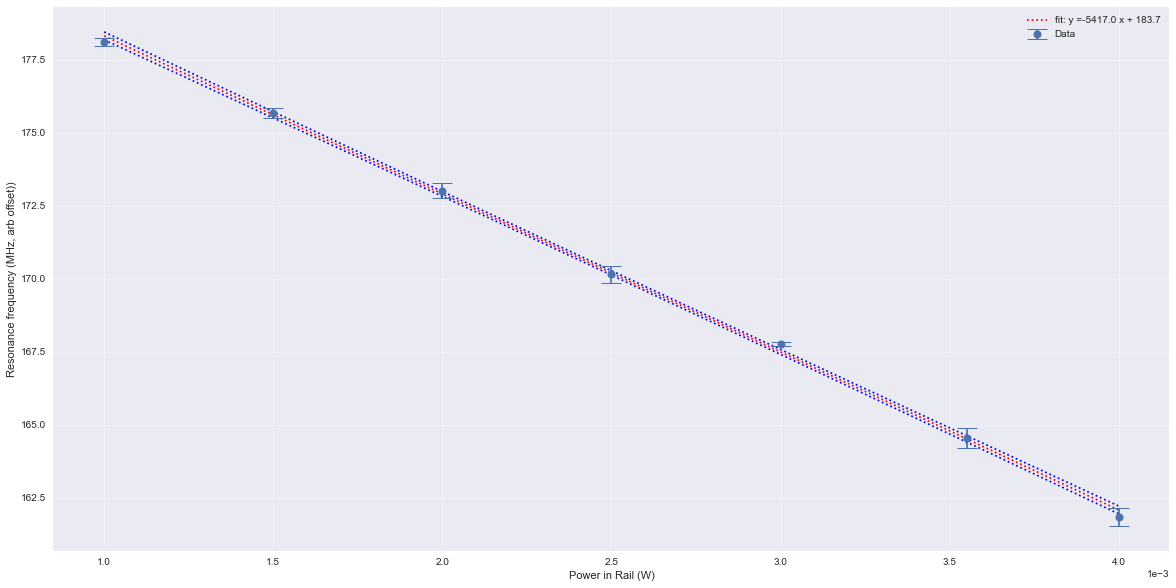

In [43]:
powerInRail = arr([0.5, 0.1, 0.3, 1, 1.5, 2, 2.5, 3.0, 3.55, 4])/1e3
powerInRail = powerInRail[3:]
resonantDac = [0.547, 0.477, 0.5302, 0.611, 0.7043, 0.8068, 0.9172, 1.009, 1.133, 1.237][3:]
resonantDacErr = [4.487e-3, 13.28e-3, 7.568e-3, 5.058e-3, 6.629e-3, 9.43e-3, 10.9e-3, 2.8e-3, 13e-3, 12.13e-3][3:]
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
standardCalPlotting(*res)

### August 7th 2018

Powers are for 100 traps so divide by 100

[0.0018 0.0015 0.0012 0.001  0.0008]


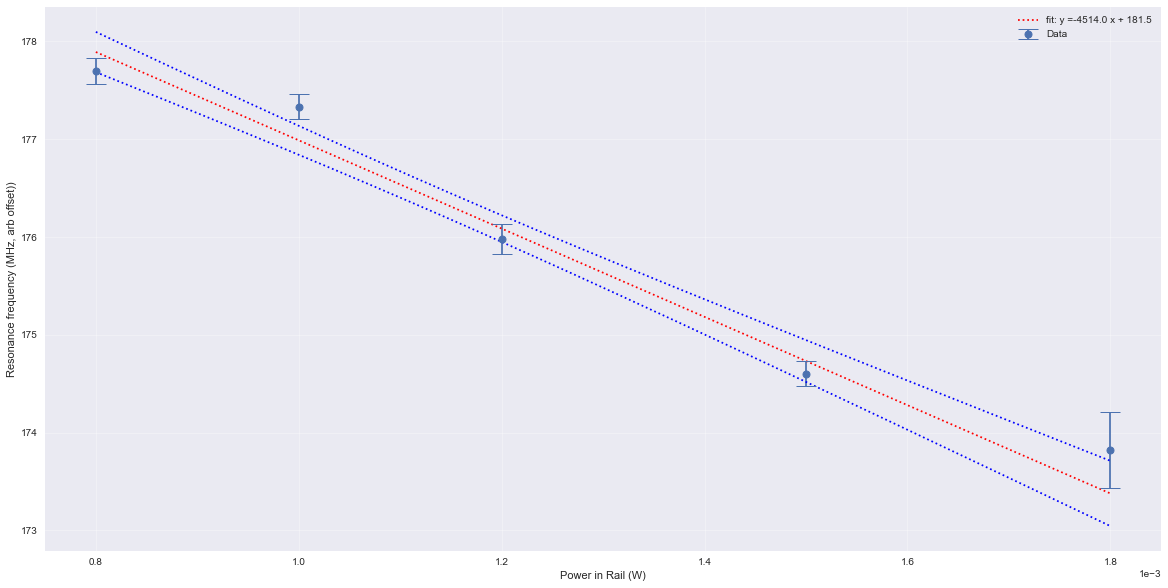

In [45]:
powerInRail =  arr([180, 150, 120, 100, 80]) / (1e5)
resonantDac = [0.776, 0.746, 0.693, 0.641, 0.627]
resonantDacErr = [0.015, 0.005, 0.006, 0.005, 0.005]
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr, useErrInFit=True)
standardCalPlotting(*res)
print(powerInRail)

### December 5th 2018

Measuring for the beginning of optimizing DM. This in particular is without the DM before putting the DM in.

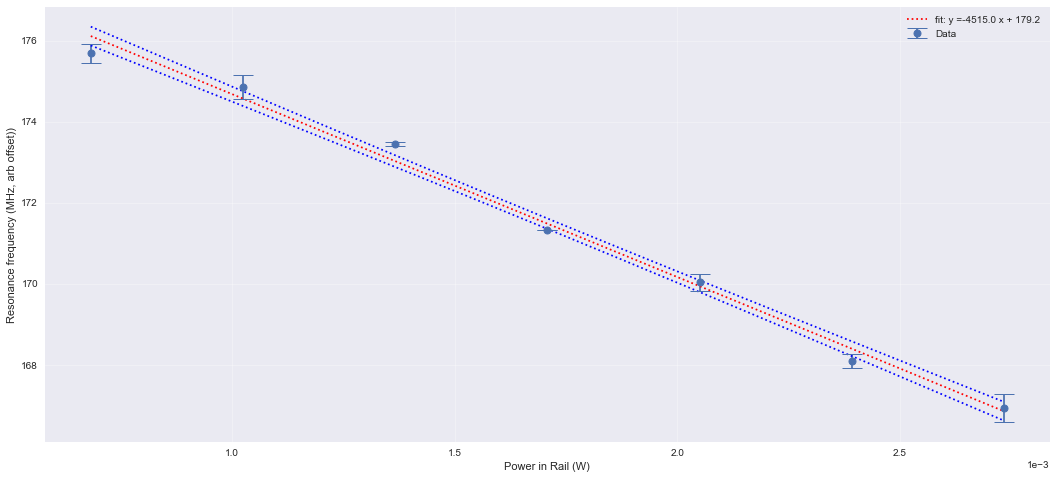

In [152]:
powerInRail = arr([15, 10, 12.5, 5, 7.5, 17.5, 20])/9e3 * 24.6/20
resonantDac = [0.7669, 0.6924, 0.7317, 0.6369, 0.6651, 0.8089, 0.8435]
resonantDacErr = [0.0049, 0.0067, 0.0053, 0.0049, 0.0052, 0.00560, 0.0090]
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
standardCalPlotting(*res)

### December 17th 2018

Measuring for the beginning of optimizing DM. This in particular is without the DM before putting the DM in.

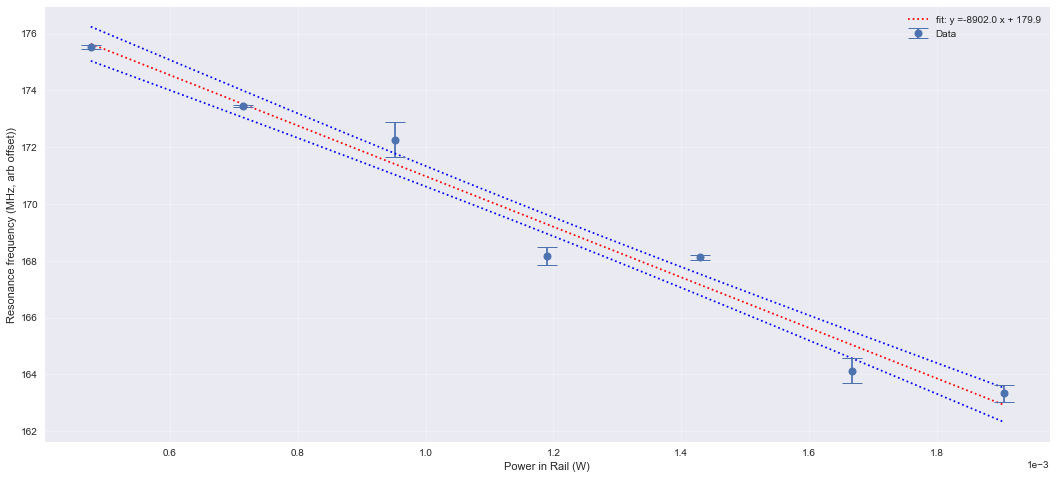

In [153]:
powerInRail = arr([5, 7.5, 10, 12.5, 15, 17.5, 20])/9e3 * 30/35
resonantDac = [0.639718,0.692148,0.717059,0.802652,0.807041,0.932887,0.955583]
resonantDacErr = [0.002175,0.005232,0.008745,0.013125,0.004089,0.012524,0.008391]
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
standardCalPlotting(*res)

### January 24th 2019

Becoming concerned about trap depth calibration

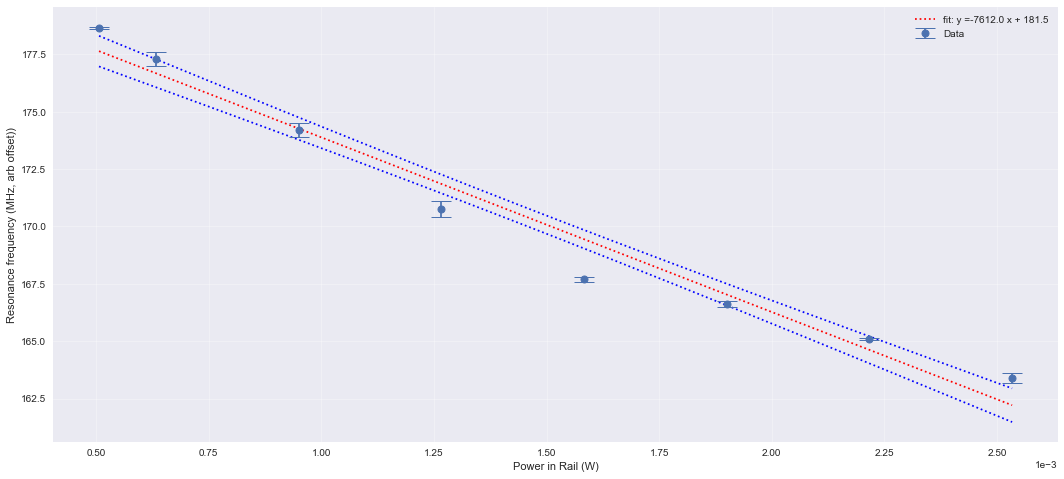

In [154]:
powerInRail = arr([2,1.5,1,0.5, 0.75, 1.25, 1.75, 0.4])*1e-3 * 3.8/3
resonantDac = [0.9537,0.8510, 0.7536,0.6053, 0.6787, 0.8208,0.9025,0.5616]
resonantDacErr = [0.0066,0.0047, 0.0041,0.0067, 0.005, 0.0062, 0.0021,0.0041]
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
standardCalPlotting(*res)

### January 25th 2019

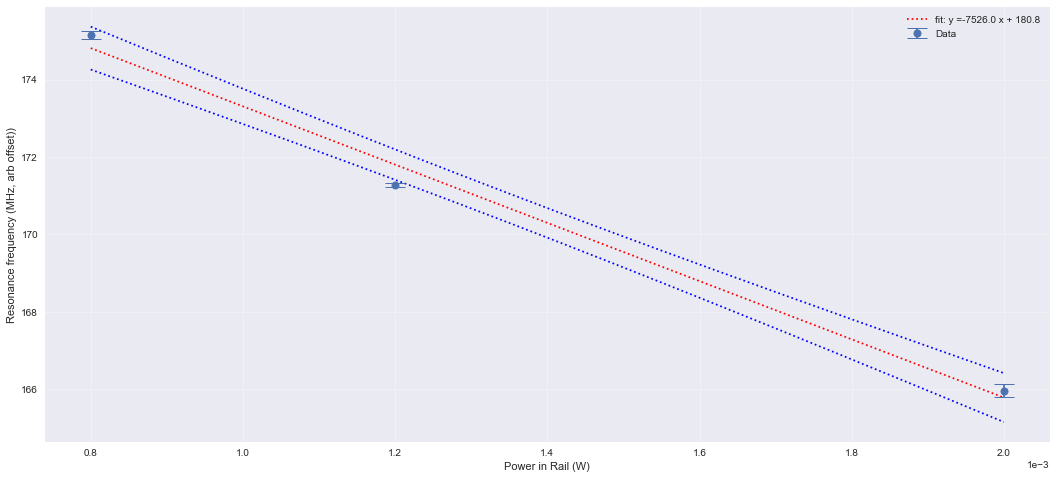

In [155]:
powerInRail = arr([1.5, 2.5, 1])*1e-3 * 2.4/3
resonantDac = [0.7420, 0.8750, 0.6572]
resonantDacErr = [0.0021, 0.0045, 0.0043]
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
standardCalPlotting(*res)

### Jan 31st 2019

In [156]:
def freqShift_feb_1_2019(dacValue):
    freq = dacToFreq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 194.68607990470966*1e6-freq
    return shift
def intensityFromDac_feb_1_2019(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_1_2019(dacValue)/0.010770874964772921

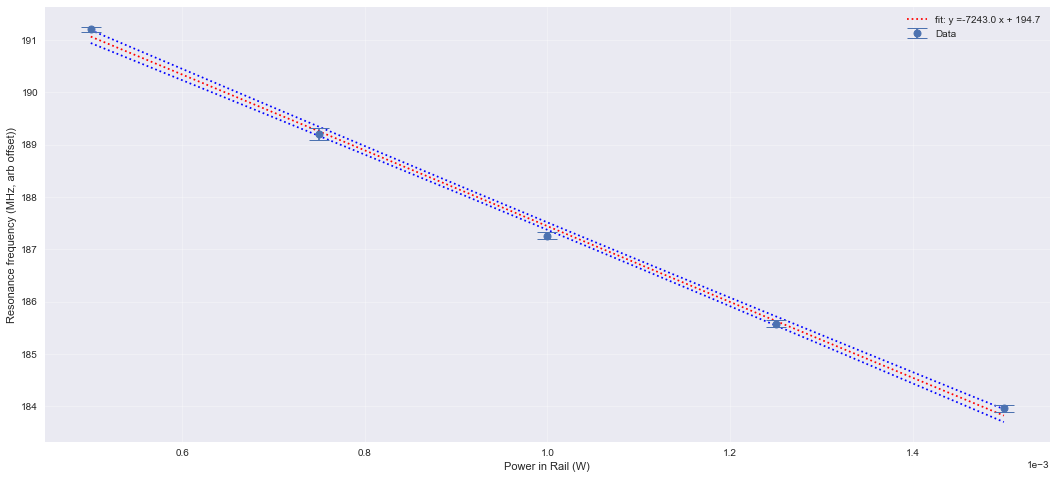

In [157]:
powerInRail = arr([ 1.5, 1.25, 1, 0.75, 0.5, 0.25])[:-1]*1e-3
resonantDac = [0.3910, 0.3150, 0.2425, 0.1659, 0.0909, 0.0355][:-1]
resonantDacErr = [0.0032, 0.0035, 0.0032, 0.004, 0.0026, 0.004][:-1]
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
standardCalPlotting(*res)

### Feb 12th 2019

In [37]:
def trapDepthFromIntensity_Feb_1st_2019(intensity):
    # assumes 852nm
    # 1e3 * ManifoldShift(2, 2, intensity, '5S12', wavelength)/mc.k_B = -4.652899246307172e-10
    return intensity*(-4.652899246307172e-10)

In [38]:
def trapDepthFromDac_Feb_1st_2019(dacValue):
    # assumes 852nm
    return trapDepthFromIntensity_Feb_1st_2019(intensityFromDac_feb_1_2019(dacValue))

In [39]:
def trapDepthFromDac_Feb_12th_2019(dacValue):
    # assumes 852nm
    return trapDepthFromIntensity_Feb_1st_2019(intensityFromDac_feb_12_2019(dacValue))

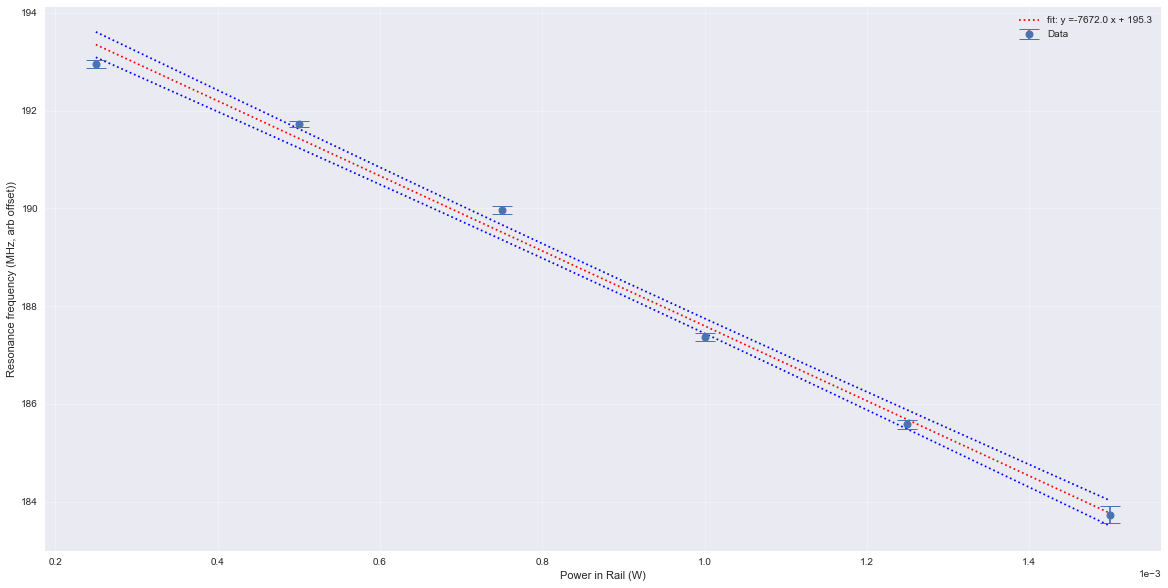

In [41]:
powerInRail = arr([1, 0.5, 0.25, 0.75, 1.5, 1.25]) *1e-3
resonantDac = [0.23824611033774493, 0.06484657083878605, 0.0033843935564516086, 0.13817494792479784, 0.4011522057067429, 0.31514578747862165] 
resonantDacErr = [0.003422681033940745, 0.0031284541197944345, 0.00396486947844555, 0.003009808727267959, 0.0059961868580695, 0.004267239306342905];
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

In [42]:
1e3 * ManifoldShift(2, 2, 1, '5S12', 850e-9)/mc.k_B# = -4.652899246307172e-10

(-4.783364396926361e-10+1.528725763344416e-25j)

In [159]:
def freqShift_feb_12_2019(dacValue):
    freq = MOT_DacToFreq.f_interp_Aug_30th_2017(dacValue)*1e6
    # fitVal[1] = 195.2917768117271
    shift = 195.26650855871887*1e6-freq
    return shift
def intensityFromDac_feb_12_2019(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_12_2019(dacValue)/0.010770874964772921

### July 26th 2019

Data was taken with 3x3, reported centers are average of individual fitted centers

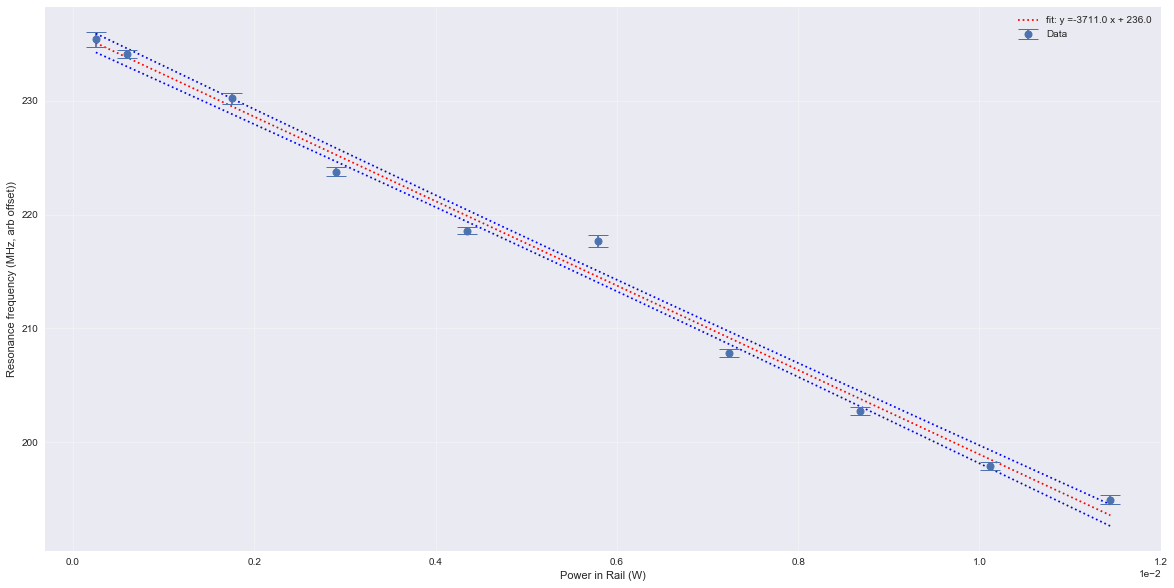

In [41]:
# power settings are 4, 10, etc.
#powerInRail = arr([4, 10, 30, 50, 75, 100, 125, 150, 200])/(2*9)*1e-3
powerInRail = arr([2.26, 5.38, 15.8, 26.1, 39.1, 52.1, 65.15, 78.1, 91.0, 103]) * 1e-3 / 9
resonantDac = [-2.1589926423685637, -2.101147233193586, -1.9093050226500878, -1.561385840925083, -1.2801880927212679, -1.2316363267968922, -0.7272848879671046, -0.4762529483585405, -0.23936503464766895, -0.09393785552073604]
resonantDacErr = [0.029756440601492795, 0.0153734281240253, 0.025933043870194374, 0.02008687444007678, 0.01755617467155615, 0.029778892026411388, 0.01751444490519905, 0.017468718202059415, 0.01743874693441557, 0.01820058627133836]
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

In [156]:
def freqShift_feb_1_2019(dacValue):
    freq = dacToFreq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 194.68607990470966*1e6-freq
    return shift
def intensityFromDac_feb_1_2019(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_1_2019(dacValue)/0.010770874964772921

In [42]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -0.33873489364570364 mk


### July 30th 2019

Data was taken with 3x3, reported centers are average of individual fitted centers

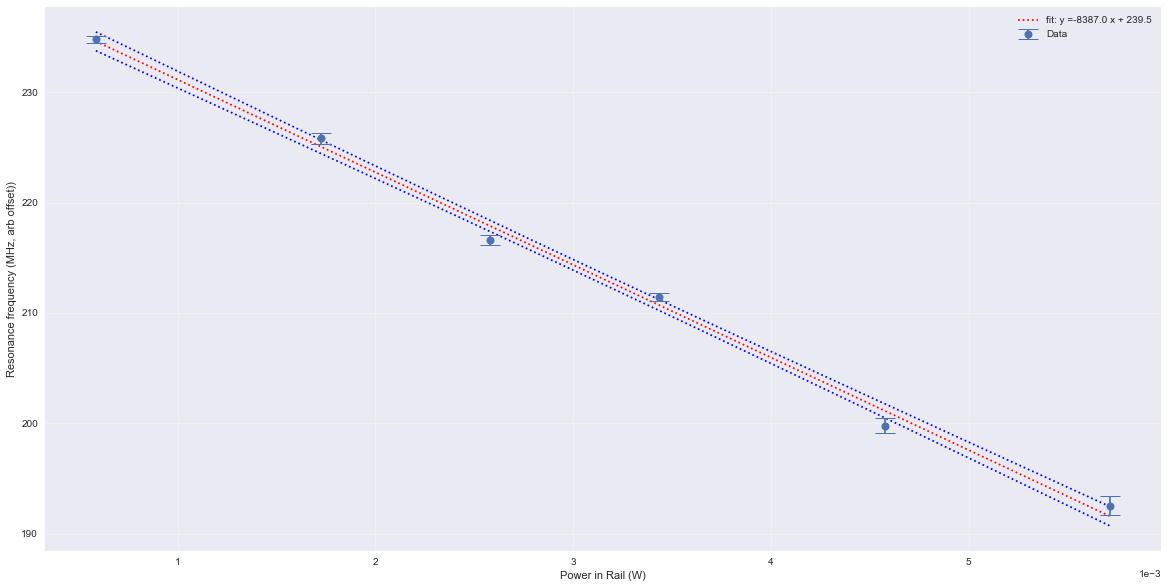

In [24]:
# power settings are 4, 10, etc.
#powerInRail = arr([4, 10, 30, 50, 75, 100, 125, 150, 200])/(2*9)*1e-3
powerInRail = arr([5.280, 15.53, 23.22, 30.91, 41.18, 51.45]) * 1e-3 / 9
resonantDac = [-2.1304191245128283, -1.6703890687188916, -1.1725075141535002, -0.902339639615445, -0.33274898283072646, 0.023084757994594637];
resonantDacErr = [0.014218470403384913, 0.028768598349522907, 0.023997260551625734, 0.017222956032612077, 0.03144977579841354, 0.04119249749826512];
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

In [25]:
def freqShift_feb_1_2019(dacValue):
    freq = dacToFreq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 194.68607990470966*1e6-freq
    return shift
def intensityFromDac_feb_1_2019(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_1_2019(dacValue)/0.010770874964772921

In [26]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -0.7655017746961441 mk


### February 25th 2020

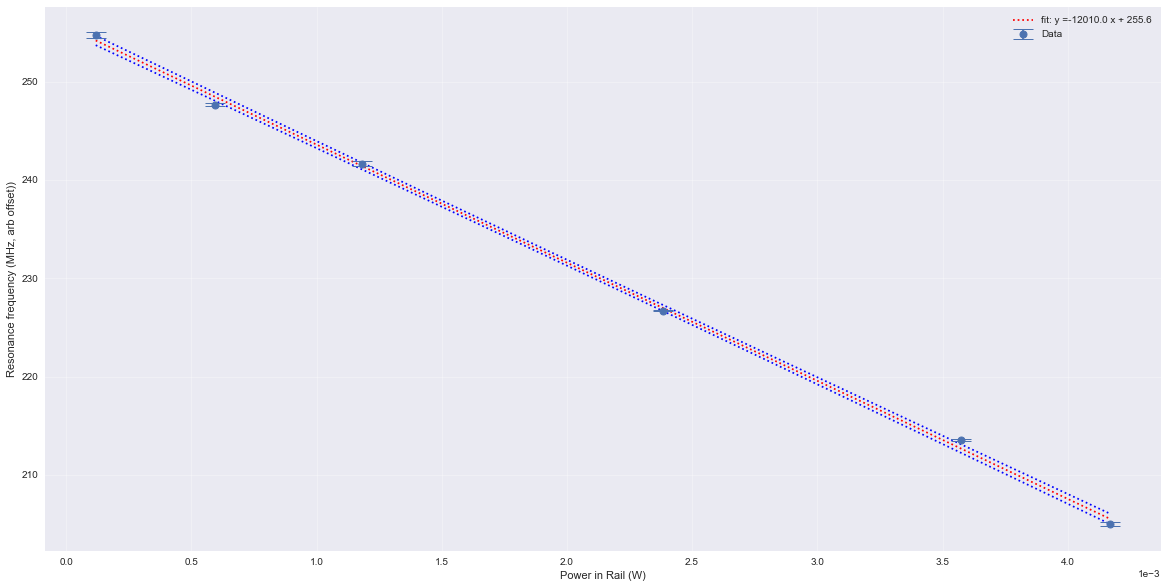

In [43]:
# power settings are 4, 10, etc.
#powerInRail = arr([4, 10, 30, 50, 75, 100, 125, 150, 200])/(2*9)*1e-3
# -2.440(12)
powerInRail = arr([1.3, 6.54, 45.87, 39.3, 26.2, 13]) * 1e-3 / 11
#powerInRail = arr([1, 5, 35, 30, 20, 10]) * 1e-3 / 11
resonantDac = [-3.029, -2.7117, -0.5877, -1.0086, -1.7185, -2.440];
resonantDacErr = [0.013, 0.0059, 0.0096, 0.0054, 0.0037, 0.012];
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

In [44]:
powerToIntensity

(785011285544.0117+0.00023822984899337114j)

In [45]:
powerInRail, resonantFreq, resonanceFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit = res

In [46]:
linFit

array([-12006.08260898,    255.59224972])

In [47]:
1e3 * ManifoldShift(2, 2, 1, '5S12', 850e-9)/mc.k_B# = -4.652899246307172e-10

(-4.783364396926361e-10+1.528725763344416e-25j)

In [48]:
def freqShift_feb_25_2020(dacValue):
    freq = dacToFreq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 255.63559297*1e6-freq
    return shift

def intensityFromDac_feb_25_2020(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_25_2020(dacValue)/0.010770874964772921

In [49]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -1.0957735256551069 mk


### March 2nd 2020

seemed to change very annoyingly

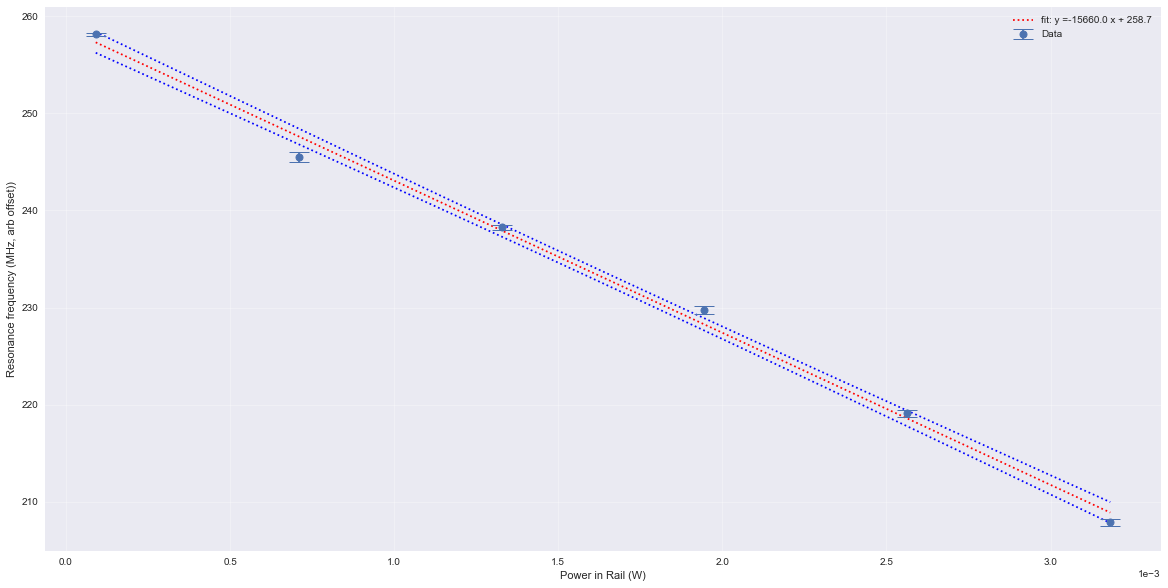

In [74]:
resonantDac = [-3.127874606102909, -2.57908271349477, -2.215078795955329, -1.795075725802651, -1.2776258566485792, -0.7073501176335317] 
resonantDacErr = [0.007362405097280416, 0.023785184502425723, 0.01262923723582403, 0.017996007825436908, 0.018857100683943567, 0.018395772951779757] 
powerInRail = arr([1.0, 7.8, 14.6, 21.4, 28.2, 35.0]) * 1e-3 / 11
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

In [75]:
powerToIntensity

(1023658767080.1526+0.000310652952375387j)

In [76]:
powerInRail, resonantFreq, resonanceFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit = res

In [77]:
linFit

array([-15655.99367461,    258.72413654])

In [78]:
1e3 * ManifoldShift(2, 2, 1, '5S12', 850e-9)/mc.k_B# = -4.652899246307172e-10

(-4.783364396926361e-10+1.528725763344416e-25j)

In [79]:
def freqShift_feb_25_2020(dacValue):
    freq = dac2freq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 255.63559297*1e6-freq
    return shift

def intensityFromDac_feb_25_2020(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_25_2020(dacValue)/0.010770874964772921

In [80]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -1.4288943317468912 mk


### March 4th 2020

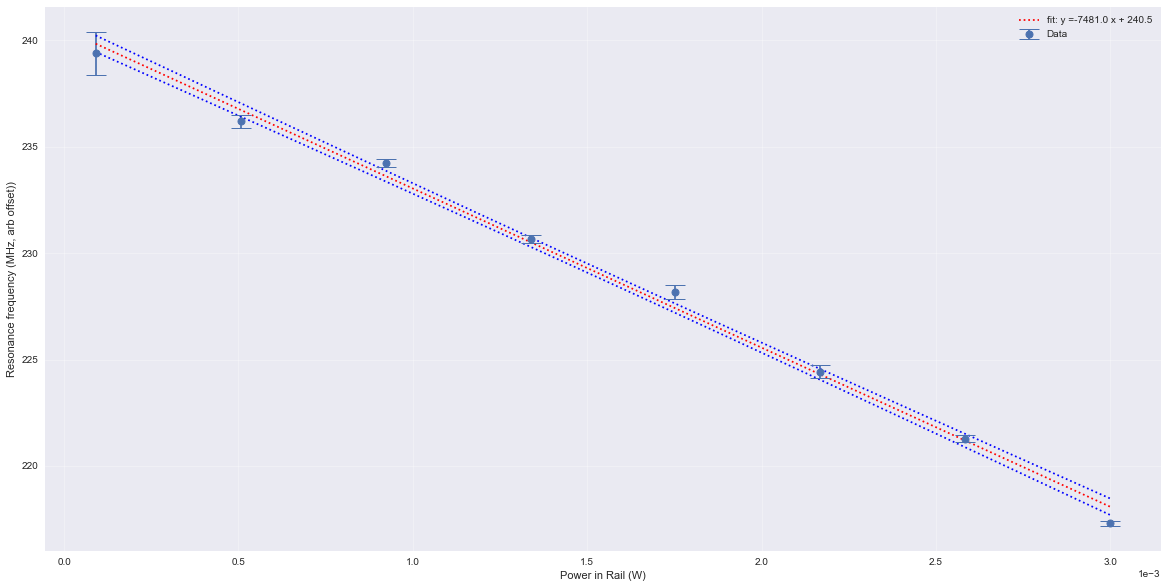

In [82]:
resonantDac = [-2.2742046695968616, -2.1071789721676595, -2.00573491329806, -1.8380502433727635, -1.7224813649241775, -1.5478929748416146, -1.3895954356263878, -1.1822895856457074] 
resonantDacErr = [0.053089187362828694, 0.016731928446433824, 0.009402126709509382, 0.009315584173999312, 0.015661248024258213, 0.013924064814410482, 0.009142946743330226, 0.006587829671451256] 
powerInRail = arr([1.0, 5.571428571428571, 10.142857142857142, 14.714285714285714, 19.285714285714285, 23.857142857142858, 28.428571428571427, 33.0]) * 1e-3 / 11
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

In [84]:
powerInRail, resonantFreq, resonanceFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit = res

In [85]:
linFit

array([-7481.43568129,   240.52537945])

In [86]:
1e3 * ManifoldShift(2, 2, 1, '5S12', 850e-9)/mc.k_B# = -4.652899246307172e-10

(-4.783364396926361e-10+1.528725763344416e-25j)

In [87]:
def freqShift_feb_25_2020(dacValue):
    freq = dac2freq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 255.63559297*1e6-freq
    return shift

def intensityFromDac_feb_25_2020(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_25_2020(dacValue)/0.010770874964772921

In [88]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -0.6828171536412334 mk


### March 4th 2020 2

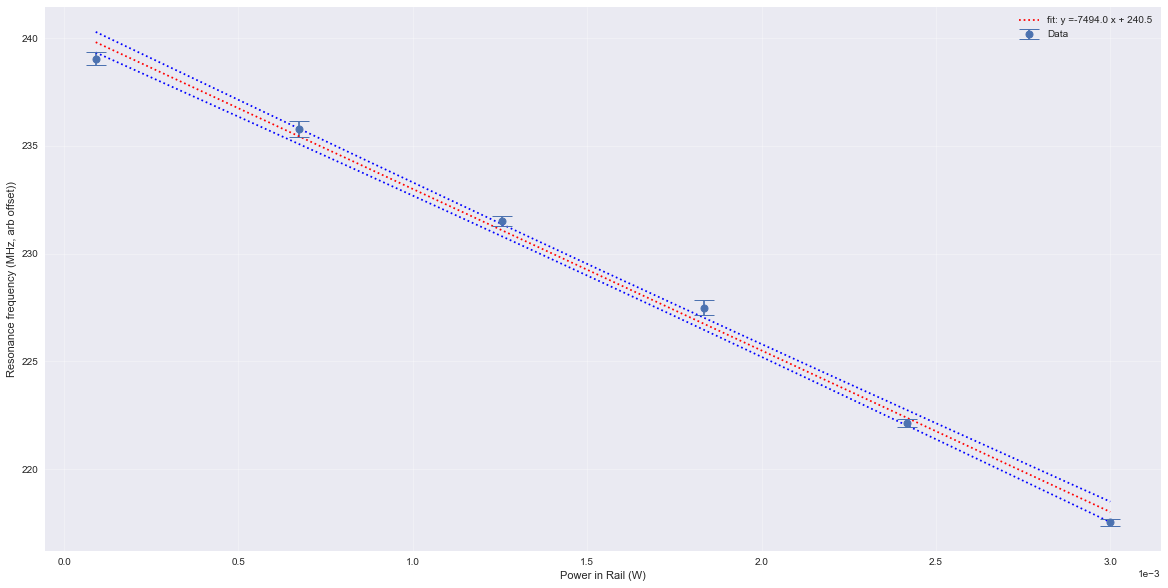

In [89]:
resonantDac = [-2.255952951445723, -2.085855036285378, -1.8765598234361796, -1.6898131914212935, -1.4336084125541417, -1.1938072612328583] 
resonantDacErr =  [0.01574717343009569, 0.019353272371591675, 0.010595840733993438, 0.01629832465987671, 0.00920902997663841, 0.008823680725006219] 
powerInRail = arr( [1.0, 7.4, 13.8, 20.2, 26.6, 33.0]) * 1e-3 / 11
res = calPowerToIntensity(powerInRail, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

In [90]:
powerToIntensity

(489964272908.6224+0.00014869100215072494j)

In [91]:
powerInRail, resonantFreq, resonanceFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit = res

In [92]:
linFit

array([-7493.5884927 ,   240.48965595])

In [93]:
1e3 * ManifoldShift(2, 2, 1, '5S12', 850e-9)/mc.k_B# = -4.652899246307172e-10

(-4.783364396926361e-10+1.528725763344416e-25j)

In [94]:
def freqShift_feb_25_2020(dacValue):
    freq = dac2freq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 255.63559297*1e6-freq
    return shift

def intensityFromDac_feb_25_2020(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_25_2020(dacValue)/0.010770874964772921

In [95]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -0.6839263188401913 mk


#### June 2nd, 2020

In [75]:
max(resonantDac)-min(resonantDac)

0.8841950941845742

In [76]:
(0.884+0.14)/0.884

1.158371040723982

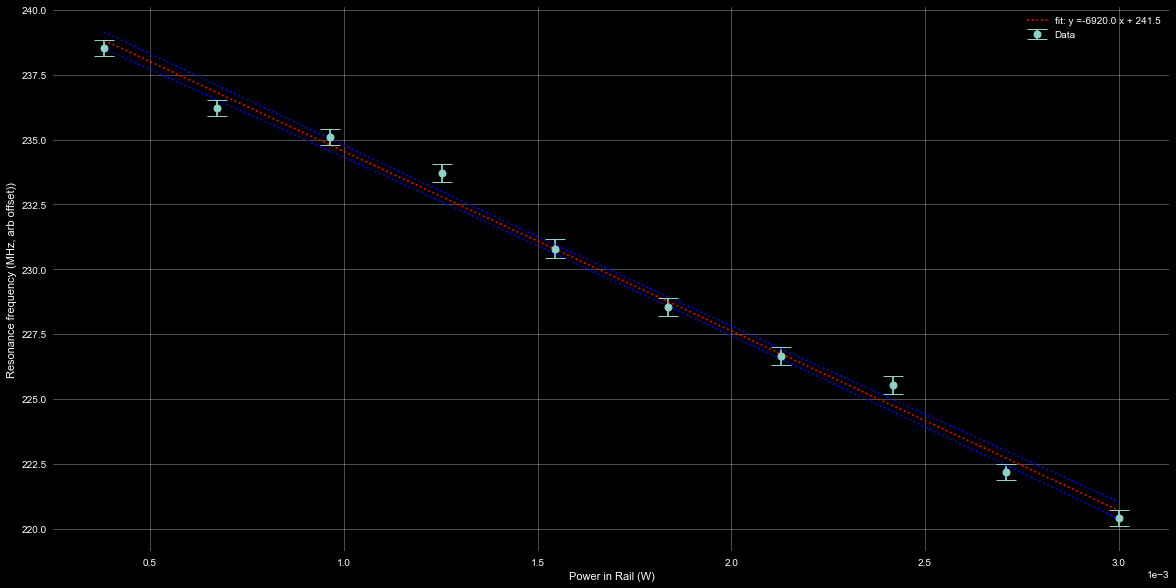

In [73]:
resonantDac = [-2.228534532164622, -2.1075443141903483, -2.048903303731973, -1.9790492582482446, -1.8441812925468848, 
               -1.7390576213878317, -1.6511735509153251, -1.5996585712895728, -1.436873757569943, -1.3443394379800477]
resonantDacErr =  [0.016186874638784876, 0.016186874638784876, 0.016186874638784876, 0.016186874638784876, 
                   0.016186874638784876, 0.016186874638784876, 0.016186874638784876, 0.016186874638784876, 0.016186874638784876, 0.016186874638784876]
powerPerTweezer_W = arr( [4.2, 7.4, 10.600000000000001, 13.8, 17.0, 20.2, 23.4, 26.599999999999998, 29.8, 33.0]) * 1e-3 / 11
res = calPowerToIntensity(powerPerTweezer_W, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

In [58]:
powerInRail, resonantFreq, resonanceFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit = res

In [59]:
linFit

array([-6920.02467723,   241.46458651])

In [60]:
1e3 * ManifoldShift(2, 2, 1, '5S12', 850e-9)/mc.k_B# = -4.652899246307172e-10

(-4.783364396926361e-10+1.528725763344416e-25j)

In [61]:
def freqShift_feb_25_2020(dacValue):
    freq = dac2freq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 255.63559297*1e6-freq
    return shift

def intensityFromDac_feb_25_2020(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_25_2020(dacValue)/0.010770874964772921

In [62]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -0.631578182921678 mk


In [64]:
import matplotlib.pyplot as plt

In [70]:
import matplotlib.style
matplotlib.style.use(['dark_background'])

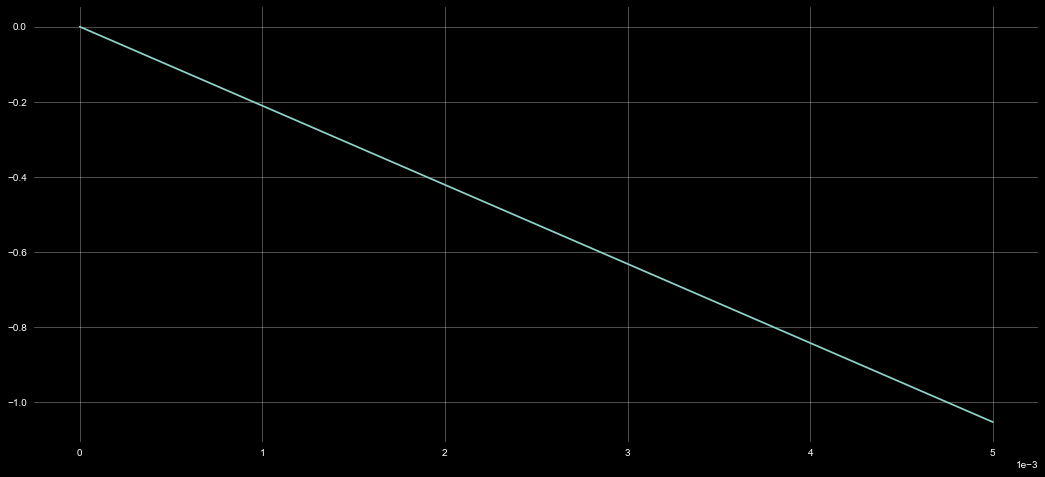

In [71]:
powers = np.linspace(0,5e-3,1000)
depths = getTrapDepth(powers)
plt.plot(powers, depths)

#### June 3rd, 2020

In [122]:
matplotlib.style.use('dark_background')

In [23]:
resonantDac = [-2.2198268163694013, -2.1385127836412776, -2.031259785901531, -1.9538260111431165, -1.822557702046991, 
               -1.72259542124447, -1.5922760329758383, -1.4607724270702174, -1.3395872108686926, -1.2124137832245867]
resonantDacErr =  [0.015081598229221616, 0.015081598229221616, 0.015081598229221616, 0.015081598229221616, 
                   0.015081598229221616, 0.015081598229221616, 0.015081598229221616, 0.015081598229221616, 0.015081598229221616, 0.015081598229221616]
powerPerTweezer_W = arr( [4.2, 7.4, 10.600000000000001, 13.8, 17.0, 20.2, 23.4, 26.599999999999998, 29.8, 33.0]) * 1e-3 / 11
res = calPowerToIntensity(powerPerTweezer_W, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

NameError: name 'calPowerToIntensity' is not defined

In [124]:
powerInRail, resonantFreq, resonanceFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit = res

In [125]:
RSPWIR*3e-3*1e-6

24.095755306910757

In [126]:
freqShift_june_3_2020(-1.2)*1e-6

-22.41392009529036

In [21]:
def getTrapDepth(power, wavelength=mc.trapWavelength):
    """
    :param power: refers to the power measured in the rail, in W.
    :returns: trap depth in mK
    """
    intensity = powerToIntensity*power
    return np.real(trapDepthFromIntensity(intensity,wavelength=wavelength))

In [22]:
getTrapDepth(3e-3)

NameError: name 'powerToIntensity' is not defined

In [94]:
linFit

array([-8031.91843564,   242.36110231])

In [95]:
1e3 * ManifoldShift(2, 2, 1, '5S12', 850e-9)/mc.k_B# = -4.652899246307172e-10

(-4.783364396926361e-10+1.528725763344416e-25j)

In [96]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -0.733058722701722 mk


In [130]:
def freqShift_june_3_2020(dacValue):
    freq = dacToFreq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 242.36110231*1e6-freq
    return shift
def intensityFromDac_june_3_2020(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_june_3_2020(dacValue) / 0.010770874964772921

In [131]:
def trapDepthFromDac(dacValue, wavelength=mc.trapWavelength):
    return 1e3 * ManifoldShift(2, 2, intensityFromDac_june_3_2020(dacValue), '5S12', wavelength)/mc.k_B

In [132]:
np.real(trapDepthFromDac(-1.2))

-1.091251771870933

In [120]:
cycling_shift = (ManifoldShift(3, 3, 1, '5P32') - ManifoldShift(2, 2, 1, '5S12'))/(2 * mc.pi * mc.hbar)
print(cycling_shift)

(0.010770874964772921-2.8726003451686652e-18j)


In [121]:
def calPowerToIntensity(powerInRail, resonantDac, resonantDacErr, useErrInFit=False, dac2freq = dacToFreq2):
    resonantFreq = dac2freq(resonantDac);
    # convert dac value uncertainty into frequency uncertainty.
    resonanceFreqErr = []
    for val in range(len(resonantDacErr)):
        resonanceFreqErr.append(dac2freq(resonantDac[val] + resonantDacErr[val]) - dac2freq(resonantDac[val]))
    linFit, cov = fit(linear.f, powerInRail, resonantFreq, sigma=arr(resonanceFreqErr)/2 if useErrInFit else None)
    errs = np.sqrt(np.diag(cov))
    fit_corrVals = unc.correlated_values(linFit, cov)
    # stands for resonanceShiftPerWattInRail. Units of hz of shift per watt of power
    RSPWIR = -1e6*linFit[0]
    RSPWIR_h = RSPWIR-1e6*errs[0]
    RSPWIR_l = RSPWIR+1e6*errs[0]
    # cycling shift per unit intensity (W/m^2)
    I0 = 1
    cycling_shift = (ManifoldShift(3, 3, I0, '5P32') - ManifoldShift(2, 2, I0, '5S12'))/(2 * mc.pi * mc.hbar)
    powerToIntensity = RSPWIR / cycling_shift
    return powerInRail, resonantFreq, resonanceFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit

#### June 4th 2020 single atom

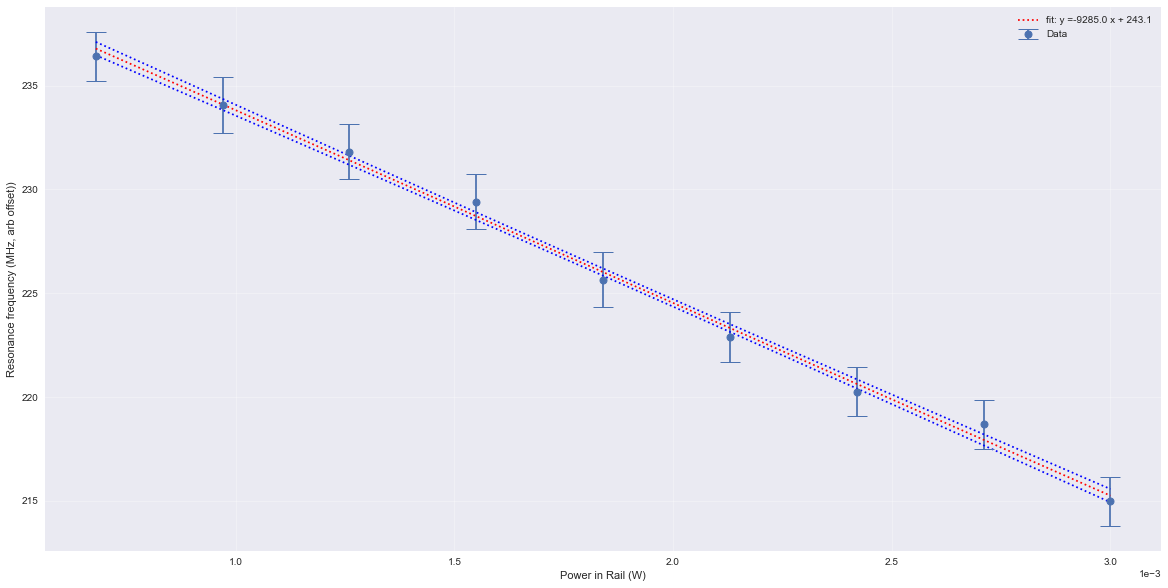

In [49]:
resonantDac = [-2.1682130252851324, -2.1183105019673363, -1.9962578894615852, -1.8914036005614805, -1.7800002839167564,
               -1.6047810387599732, -1.4739071880757046, -1.3362987769726558, -1.2541291629226197, -1.0610697207863204][1:]

resonantDacErr =  [0.061956651056989276, 0.061956651056989276, 0.061956651056989276, 0.061956651056989276, 0.061956651056989276,
                   0.061956651056989276, 0.061956651056989276, 0.061956651056989276, 0.061956651056989276, 0.061956651056989276][1:]

powerPerTweezer_W = arr( [0.39, 0.6799999999999999, 0.97, 1.2599999999999998, 1.5499999999999998, 1.8399999999999999, 2.13, 2.4200000000000004, 2.71, 3.0])[1:] * 1e-3
res = calPowerToIntensity(powerPerTweezer_W, resonantDac, resonantDacErr)
powerToIntensity = res[6]
standardCalPlotting(*res)

In [50]:
powerInRail, resonantFreq, resonanceFreqErr, RSPWIR, RSPWIR_h, RSPWIR_l, powerToIntensity, fit_corrVals, linFit = res

In [51]:
linFit

array([-9284.88693179,   243.10363908])

In [52]:
1e3 * ManifoldShift(2, 2, 1, '5S12', 850e-9)/mc.k_B# = -4.652899246307172e-10

(-4.783364396926361e-10+1.528725763344416e-25j)

In [53]:
def freqShift_feb_25_2020(dacValue):
    freq = dac2freq(dacValue)*1e6
    # fitVal[1] = 194.68607990470966
    shift = 255.63559297*1e6-freq
    return shift

def intensityFromDac_feb_25_2020(dacValue):
    # shift / shift per unit intensity = intensity
    # np.real(CyclingShift(1)) = 0.010770874964772921
    return freqShift_feb_25_2020(dacValue)/0.010770874964772921

In [54]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -0.8474148995896297 mk


# Testing Area

In [27]:
import Miscellaneous as misc

In [41]:
print('Ground-State Shift (Trap Depth):', getTrapDepth(3e-3), 'mk')

Ground-State Shift (Trap Depth): -0.9942465333506967 mk


In [36]:
powerInRail = 3e-3
intensity = powerInRail * powerToIntensity
print('Ground-State Shift (Trap Depth):', getStateShiftIn_mk(intensity, '5S12'), 'mk')

Ground-State Shift (Trap Depth): -0.9942465333506967 mk


In [52]:
powerInRail = 3e-3
intensity = powerInRail * powerToIntensity
print('Ground-State Shift (Trap Depth):', getStateShiftIn_mk(intensity, '5S12'), 'mk')

Ground-State Shift (Trap Depth): -1.1536369463593543 mk


In [57]:
powerInRail = 3e-3
intensity = powerInRail * powerToIntensity
print('Ground-State Shift (Trap Depth):', getStateShiftIn_mk(intensity, '5S12'), 'mk')
print('D1-Excited-State Shift:', getStateShiftIn_mk(intensity, '5P12'), 'mk')
print('D2-Excited-State Shift:', getStateShiftIn_mk(intensity, '5P32'), 'mk')

Ground-State Shift (Trap Depth): -0.5850681103946441 mk
D1-Excited-State Shift: 0.3378879067117074 mk
D2-Excited-State Shift: 0.27685363073541785 mk


In [54]:
powerInRail = 1e-3
intensity = powerInRail * powerToIntensity
print('Ground-State Shift (Trap Depth):', getStateShiftIn_mk(intensity, '5S12'), 'mk')
print('D1-Excited-State Shift:', getStateShiftIn_mk(intensity, '5P12'), 'mk')
print('D2-Excited-State Shift:', getStateShiftIn_mk(intensity, '5P32'), 'mk')

Ground-State Shift (Trap Depth): -0.33228517568020316 mk
D1-Excited-State Shift: 0.1919009777616886 mk
D2-Excited-State Shift: 0.1572370048754969 mk
